<a href="https://colab.research.google.com/github/Muluken1Walle/Dog.VS.Cat/blob/main/Dog_vs_Cat_Projec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#base directory path
base_dir="/content/drive/MyDrive/Dataset/Cat VS DOg/Dog&Cat"
#Muluken#base_dir="/content/drive/MyDrive/Dog&Cat"
#training directory path 
train_dir=os.path.join(base_dir,"training_set/training_set")
#testing directory path
test_dir=os.path.join(base_dir,"test_set/test_set")

In [ ]:
#Directoy with our training cat pictures 
train_cats_dir=os.path.join(train_dir,'cats')
#directory with our training dog picture
train_dogs_dir=os.path.join(train_dir,'dogs')
#Directory with our Testing Cat Picture
test_cat_dir=os.path.join(test_dir,"cats")
#Directory with our Testing Dogs Picture
test_dogs_dir=os.path.join(test_dir,"dogs")


In [ ]:
train_cat_names=os.listdir(train_cats_dir)
print(train_cat_names[:10])
train_dogs_names=os.listdir(train_dogs_dir)
print(train_dogs_names[:10])

['cat.1004.jpg', 'cat.1003.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.1012.jpg', 'cat.101.jpg']
['dog.3695.jpg', 'dog.3713.jpg', 'dog.3697.jpg', 'dog.3709.jpg', 'dog.37.jpg', 'dog.3708.jpg', 'dog.3694.jpg', 'dog.3701.jpg', 'dog.3704.jpg', 'dog.3716.jpg']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ncols=4
nrows=4
pic_index=0

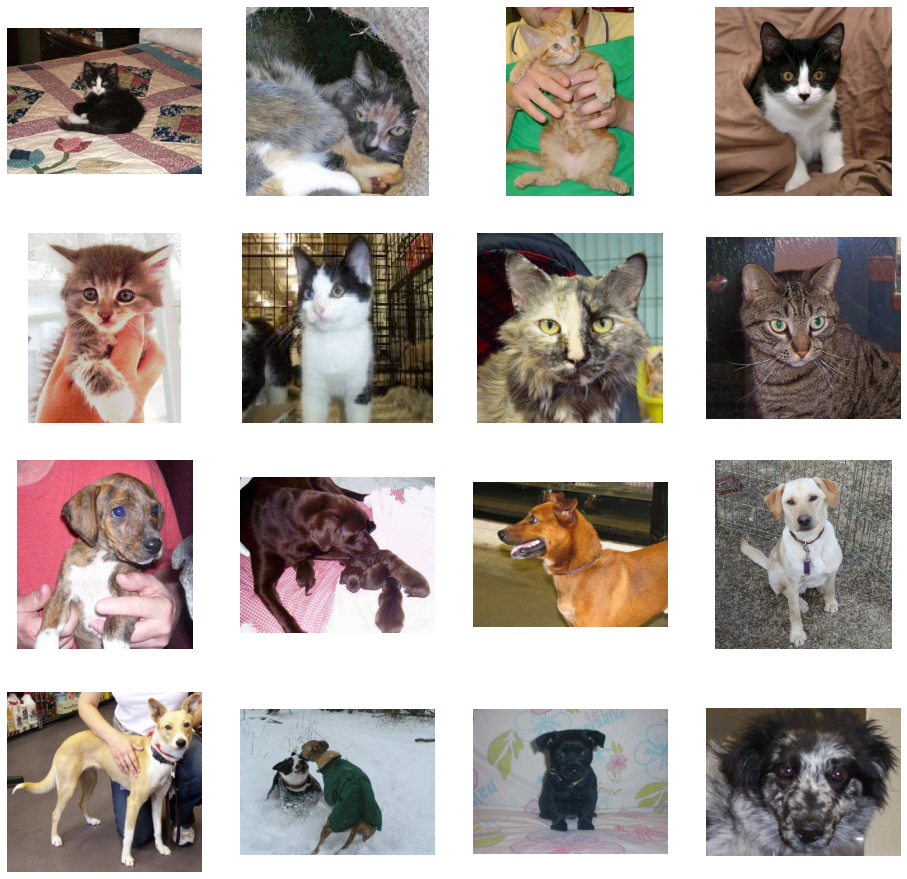

In [ ]:

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index +=8
next_cat_pix=[os.path.join(train_cats_dir,fname)for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix=[os.path.join(train_dogs_dir,fname) for fname in train_dogs_names[pic_index-8:pic_index]]
for i , img_path in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis("off")

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#flow training images in batches of 20 using train_datagen
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
train_generator


Found 4059 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_generator


Found 0 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
cnn= tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cnn.fit(x = train_generator, validation_data = test_generator, epochs = 10, steps_per_epoch=100,verbose=2)


Epoch 1/10


In [ ]:
import numpy as np
import random
from keras.preprocessing import image
cat_img_files=[os.path.join(train_cats_dir,f)for f in train_cat_names]
dog_img_files=[os.path.join(train_dogs_dir,f)for f in train_dogs_names]
img_path=random.choice(cat_img_files +dog_img_files)
img_pp="/content/drive/MyDrive/Dog&Cat/training_set/training_set/dogs/dog.10.jpg"
test_image = image.load_img(img_pp, target_size = (150, 150))
test_image = image.img_to_array(test_image)
#test_image=test
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)
if result[0][0] > 0.5:
    prediction = 'cat'
else:
    prediction = 'Dog'

print("This is the Image of a ",prediction)

In [ ]:
test_cat_names

In [ ]:
x=mpimg.imread(img_pp)
plt.imshow(x)